In [63]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBRegressor
from xgboost import plot_importance

import matplotlib.pyplot as plt
import platform

%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin' :
    rc('font', family() == 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = '/usr/share/fonts/NanumGothic.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else :
    print('Unknown system')

In [64]:
PATH = 'Desktop/김진한/대외활동/야구공작소'
pitcher_df = pd.read_csv(PATH+'/pitcher_df.csv', encoding='cp949', index_col=[0,2])

In [65]:
pitcher_df[['ERA', 'WHIP']]

,,ERA,WHIP
이름,팀,,
고효준,17KIA,4.28,1.65
김광수,17KIA,11.76,2.03
김세현,17KIA,3.43,1.29
김윤동,17KIA,4.59,1.46
김진우,17KIA,7.93,2.06
박진태,17KIA,6.55,1.65
심동섭,17KIA,5.68,1.68
양현종,17KIA,3.44,1.31
임기영,17KIA,3.65,1.32


In [66]:
df1 = pitcher_df[['ERA', 'WHIP', 'WAR', 'FIP']]

In [55]:
df1[['ERA', 'WHIP']] = preprocessing.StandardScaler().fit_transform(pitcher_df[['ERA', 'WHIP']])

C:\Users\USER\AppData\Local\Temp\ipykernel_23732\212663518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['ERA', 'WHIP']] = preprocessing.StandardScaler().fit_transform(pitcher_df[['ERA', 'WHIP']])


In [67]:
df1

,,ERA,WHIP,WAR,FIP
이름,팀,,,,
고효준,17KIA,4.28,1.65,0.83,4.34
김광수,17KIA,11.76,2.03,-0.77,7.41
김세현,17KIA,3.43,1.29,0.70,3.40
김윤동,17KIA,4.59,1.46,1.89,5.54
김진우,17KIA,7.93,2.06,-0.79,6.68
박진태,17KIA,6.55,1.65,-0.12,5.38
심동섭,17KIA,5.68,1.68,0.19,4.31
양현종,17KIA,3.44,1.31,4.56,3.94
임기영,17KIA,3.65,1.32,2.73,4.07


In [68]:
pd.options.display.max_rows=None

In [69]:
df1['WHIP-ERA'] = (df1['WHIP'] - df1['ERA'])

C:\Users\USER\AppData\Local\Temp\ipykernel_23732\1223775179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WHIP-ERA'] = (df1['WHIP'] - df1['ERA'])


In [70]:
df1.sort_values(by = 'WHIP-ERA', ascending=False)

,,ERA,WHIP,WAR,FIP,WHIP-ERA
이름,팀,,,,,
박희수,19SSG,1.26,1.47,0.91,4.55,0.21
홍성민,20NC,1.04,1.00,1.39,4.29,-0.04
윤대경,20한화,1.59,1.43,2.20,4.14,-0.16
정우람,19한화,1.54,1.25,3.82,3.32,-0.29
문경찬,19KIA,1.31,1.00,2.89,2.55,-0.31
고우석,19LG,1.54,1.09,3.89,3.26,-0.45
고영창,22KIA,1.88,1.42,0.80,5.30,-0.46
고우석,22LG,1.48,0.96,3.68,2.88,-0.52
김강률,21두산,2.09,1.53,2.49,3.53,-0.56


In [60]:
df2 = pd.read_csv(PATH+'/승계주자실점률.csv', encoding='cp949',index_col=[0,1])
df2

승계주자실점
이름  팀            
김승회 18두산     48.4
김명신 22두산     46.5
박치국 19두산     43.1
김강률 21두산     42.1
홍건희 20두산     41.4
박치국 18두산     40.4
이현승 17두산     40.0
홍건희 21두산     37.8
    22두산     37.5
김성배 17두산     36.8
김승회 19두산     36.7
정철원 22두산     36.1
함덕주 18두산     34.9
윤명준 19두산     33.3
이현승 20두산     32.5
박치국 20두산     32.3
김승회 17두산     31.4
김명신 21두산     29.6
이형범 19두산     29.2
김강률 17두산     25.6
이승진 21두산     22.7
이용찬 17두산     18.5
함덕주 19두산     17.4
김강률 18두산     17.3
권혁  19두산     15.4
노건우 20삼성     60.0
김윤수 20삼성     53.9
권오준 18삼성     52.4
최지광 20삼성     44.4
    21삼성     43.8
이상민 22삼성     40.5
장필준 19삼성     40.0
이승현 22삼성     37.0
우규민 22삼성     34.1
장필준 18삼성     33.3
우규민 20삼성     33.3
심창민 18삼성     32.0
오승환 20삼성     31.6
우규민 21삼성     30.8
권오준 17삼성     30.6
심창민 17삼성     30.4
    21삼성     28.2
김대우 19삼성     26.3
우규민 19삼성     25.0
임현준 20삼성     25.0
이승현 22삼성     25.0
장원삼 17삼성     25.0
오승환 21삼성     24.2
최지광 19삼성     23.7
최충연 18삼성     23.3
장필준 17삼성     21.2
오승환 22삼성     21.1
임현준 19삼성     19.6
우규민 18삼성     12.5
이승현 20삼성     10.3
이민호 18NC     64.7
원종현 21NC     60.0
    17NC     48.2
    22NC     47.6
류진욱 21NC     45.0
배재환 20NC     44.4
원종현 18NC     41.9
임창민 17NC     41.7
    20NC     37.0
원종현 19NC     35.7
임창민 21NC     35.7
장현식 19NC     35.4
김영규 22NC     34.1
김시훈 22NC     33.3
이민호 17NC     33.3
배재환 19NC     32.1
김진성 18NC     31.0
홍성민 21NC     30.0
강윤구 18NC     30.0
김진성 17NC     29.6
류진욱 22NC     29.4
원종현 20NC     28.6
하준영 22NC     26.9
이용찬 22NC     23.1
김진성 20NC     21.7
임정호 17NC     18.9
김정훈 19NC     17.9
강윤구 19NC     16.7
임정호 20NC     16.4
    21NC     14.3
김성진 21키움     53.3
양현  20키움     45.2
김태훈 20키움     42.1
김성민 21키움     41.4
이승호 22키움     40.9
김재웅 21키움     40.9
양현  21키움     39.1
김상수 19키움     38.9
김성민 19키움     38.5
조상우 21키움     37.5
김상수 20키움     33.3
김재웅 22키움     28.6
윤영삼 19키움     25.0
김태훈 21키움     21.4
한현희 19키움     21.1
조상우 20키움     20.0
    19키움     15.4
이영준 20키움     14.3
오주원 19키움      0.0
고효준 22SSG    41.2
서진용 21SSG    40.0
김택형 22SSG    38.7
최민준 22SSG    30.0
김택형 21SSG    29.4
장지훈 21SSG    29.4
서진용 22SSG    28.6
김태훈 21SSG    20.5
김상수 21SSG    11.1
강재민 22한화     58.3
안영명 19한화     52.2
김진영 20한화     46.4
박상원 20한화     45.5
윤호솔 22한화     42.9
신정락 22한화     41.2
김종수 22한화     40.7
심수창 17한화     40.5
주현상 22한화     40.0
박상원 19한화     37.1
강재민 21한화     36.1
윤호솔 21한화     35.7
김범수 22한화     34.5
김종수 20한화     34.4
송은범 18한화     33.3
박상원 18한화     33.3
서균  18한화     33.3
이태양 19한화     32.7
정우람 17한화     32.3
윤대경 20한화     31.6
정우람 18한화     31.6
박정진 17한화     31.3
이태양 18한화     31.0
송창식 17한화     30.4
김범수 18한화     28.1
정우람 19한화     28.0
김종수 21한화     27.8
정우람 21한화     21.4
김범수 21한화     21.2
안영명 18한화     18.8
장시환 22한화     16.0
정우람 20한화     14.3
강재민 20한화     11.4
정찬헌 18LG     52.2
정우영 19LG     46.7
최동환 22LG     43.8
최성훈 21LG     43.2
송은범 20LG     41.4
최성훈 20LG     40.9
고우석 18LG     37.5
김지용 18LG     35.0
진해수 18LG     35.0
최동환 20LG     34.4
김지용 17LG     34.3
최성훈 22LG     33.3
정찬헌 17LG     33.3
이정용 22LG     31.3
진해수 17LG     30.2
정우영 21LG     28.9
고우석 21LG     27.3
신정락 18LG     25.7
김대유 21LG     25.6
정우영 20LG     25.5
진해수 19LG     24.5
신정락 17LG     23.7
정우영 22LG     23.6
김진성 22LG     23.5
진해수 22LG     21.6
    20LG     20.8
이정용 21LG     20.5
고우석 19LG     17.9
    22LG     15.0
진해수 21LG     13.6
이동현 17LG     13.3
김대유 22LG     12.5
박시영 17롯데     53.6
김유영 22롯데     48.3
김대우 20롯데     45.8
구승민 18롯데     42.9
손승락 17롯데     42.5
이인복 20롯데     42.3
오현택 18롯데     41.0
이명우 18롯데     38.1
구승민 20롯데     37.9
박진형 20롯데     31.8
진명호 18롯데     31.7
배장호 17롯데     30.2
오현택 20롯데     29.4
장시환 17롯데     29.2
구승민 22롯데     29.0
김원중 21롯데     28.6
고효준 19롯데     26.8
김원중 20롯데     26.7
김도규 22롯데     22.9
진명호 19롯데     22.5
구승민 21롯데     21.7
최준용 21롯데     20.0
    22롯데     19.4
손승락 19롯데     18.8
    18롯데      0.0
박진태 21KT     70.6
고영창 19KT     63.9
문경찬 19KT     56.5
고영창 20KT     54.1
임창용 17KT     45.5
장현식 21KT     40.0
하준영 19KT     37.1
심동섭 17KT     34.4
이준영 21KT     34.3
장현식 22KT     31.8
김윤동 17KIA    31.4
    18KIA    31.3
홍상삼 21KIA    30.4
정해영 20KIA    30.0
이준영 20KIA    30.0
정해영 21KIA    28.1
전상현 19KIA    25.0
김재열 22KIA    24

In [61]:
enLI=pd.read_csv(PATH+'/enLI.csv', encoding='cp949', index_col=[0,1])
enLI.dropna(inplace=True)

In [62]:
df3 = df1.join(df2, how='left').join(enLI, how='left')
df3.dropna(inplace=True)
df3

ERA      WHIP   WAR   FIP  WHIP-ERA  승계주자실점  enLI
이름  팀                                                            
강윤구 18NC   0.885129 -0.048096 -0.11  5.32 -0.933225    30.0  1.46
    19NC  -0.142225 -0.284616  0.44  3.97 -0.142391    16.7  1.20
강재민 20한화  -1.347146 -1.073016  1.99  3.07  0.274130    11.4  1.28
    21한화  -1.626181 -0.994176  3.12  3.33  0.632005    36.1  1.63
    22한화  -0.307109 -0.205776  0.83  5.05  0.101333    58.3  1.47
고우석 18LG   0.770978  0.424945 -0.01  6.34 -0.346034    37.5  0.63
    19LG  -2.000340 -1.506636  3.89  3.26  0.493704    17.9  1.67
    21LG  -1.600814 -1.033596  3.13  2.75  0.567218    27.3  1.85
    22LG  -2.038390 -2.019096  3.68  2.88  0.019294    15.0  1.76
고효준 19롯데   0.041684  0.149004  0.70  3.93  0.107320    26.8  1.39
    22SSG -0.617852 -0.205776  0.61  3.42  0.412076    41.2  1.18
구승민 18롯데  -0.649560 -0.836496  2.20  5.06 -0.186936    42.9  1.24
    20롯데  -0.706635 -1.506636  1.94  4.55 -0.800001    37.9  1.63
    21롯데  -0.231009 -0.875916  1.27  3.97 -0.644907    21.7  1.36
    22롯데  -1.137870 -0.639396  2.42  3.03  0.498475    29.0  1.37
권오준 17삼성   0.282668 -0.797076  0.90  5.29 -1.079744    30.6  1.07
    18삼성  -0.471993 -0.797076  1.06  4.57 -0.325083    52.4  0.85
권혁  19두산   0.136809 -1.191276 -0.21  4.06 -1.328085    15.4  1.07
김강률 17두산  -0.795419 -0.442296  2.33  4.15  0.353123    25.6  1.09
    18두산  -0.047100 -0.836496  1.04  3.93 -0.789396    17.3  1.28
    21두산  -1.651547  0.227844  2.49  3.53  1.879392    42.1  1.69
김대유 21LG  -1.626181 -2.137356  2.09  3.06 -0.511176    25.6  1.49
    22LG  -1.537397 -0.718236  1.39  3.69  0.819161    12.5  1.05
김도규 22롯데  -0.624193 -0.639396  0.86  4.46 -0.015202    22.9  1.25
김명신 21두산  -0.250034 -0.757656  0.57  4.06 -0.507622    29.6  0.79
    22두산  -0.681269 -0.836496  1.64  3.68 -0.155227    46.5  0.92
김민수 21KT  -1.106162 -0.363456  1.18  3.13  0.742706    40.0  0.99
    22KT  -1.772039 -1.861416  4.01  2.24 -0.089377    37.5  1.53
김범수 18한화   0.682195  0.819145  0.36  5.34  0.136950    28.1  0.97
    21한화   0.333402  0.346105  0.05  3.55  0.012703    21.2  1.31
    22한화  -0.211984  0.109584  0.66  4.07  0.321568    34.5  1.50
김사윤 20SSG  0.276327  1.016245  0.36  6.45  0.739918    50.0  1.17
김상수 17키움  -0.554435 -0.599976  1.85  4.39 -0.045541    13.6  1.41
    18키움   0.301693 -0.402876  0.97  4.68 -0.704569    48.2  1.89
    19키움  -1.163237 -0.363456  1.73  3.51  0.799781    38.9  1.49
    19키움  -1.163237 -0.363456  1.73  3.51  0.799781    38.9  1.49
    20키움   0.022659 -0.205776  0.18  3.79 -0.228435    33.3  1.41
    20키움   0.022659 -0.205776  0.18  3.79 -0.228435    33.3  1.41
    21SSG  0.250960  1.016245  0.32  5.49  0.765285    11.1  1.06
김성민 18키움   0.948546  0.937405 -0.08  4.96 -0.011141    37.5  0.69
    19키움  -1.353488 -1.309536  1.40  2.75  0.043952    38.5  0.70
    19키움  -1.353488 -1.309536  1.40  2.75  0.043952    38.5  0.70
    21키움  -0.896886  0.779725  0.95  5.41  1.676611    41.4  1.48
    21키움  -0.896886  0.779725  0.95  5.41  1.676611    41.4  1.48
김성배 17두산   0.396819 -0.797076  0.48  5.62 -1.193895    36.8  0.66
김성진 21키움   0.390477  0.306684 -0.29  4.73 -0.083793    53.3  0.74
    21키움   0.390477  0.306684 -0.29  4.73 -0.083793    53.3  0.74
김승회 17두산   0.168518  0.070164  0.89  4.59 -0.098353    31.4  1.00
    18두산  -0.782736 -0.245196  1.22  5.50  0.537540    48.4  1.29
    19두산  -1.030062 -0.915336  1.00  2.93  0.114726    36.7  1.20
김시훈 22NC  -0.922253 -0.205776  1.88  4.23  0.716477    33.3  1.00
김영규 22NC  -0.814444 -1.151856  1.84  4.07 -0.337412    34.1  1.47
김원중 20롯데  -0.478335 -0.836496  1.61  4.30 -0.358161    26.7  1.66
    21롯데  -0.700294 -0.875916  2.26  3.83 -0.175622    28.6  1.90
김유영 22롯데   0.606095  2.080585  0.02  3.32  1.474490    48.3  1.24
김윤동 17KIA -0.066125 -0.048096  1.89  5.54  0.018029    31.4  1.52
    18KIA -0.630535  0.149004  2.37  5.12  0.779540    31.3  1.49
김윤수 20삼성  -0.021733  0.779725  0.82  4.99  0.801457    53.9  1.00
김재열 22KIA  0.872446  0.346105 -0.38  4.64 -0.526341    2

In [13]:
df3.drop_duplicates(inplace=True)

In [14]:
df3

ERA      WHIP   WAR   FIP  WHIP-ERA  승계주자실점  enLI
이름  팀                                                            
강윤구 18NC   0.885129 -0.048096 -0.11  5.32 -0.933225    30.0  1.46
    19NC  -0.142225 -0.284616  0.44  3.97 -0.142391    16.7  1.20
강재민 20한화  -1.347146 -1.073016  1.99  3.07  0.274130    11.4  1.28
    21한화  -1.626181 -0.994176  3.12  3.33  0.632005    36.1  1.63
    22한화  -0.307109 -0.205776  0.83  5.05  0.101333    58.3  1.47
고우석 18LG   0.770978  0.424945 -0.01  6.34 -0.346034    37.5  0.63
    19LG  -2.000340 -1.506636  3.89  3.26  0.493704    17.9  1.67
    21LG  -1.600814 -1.033596  3.13  2.75  0.567218    27.3  1.85
    22LG  -2.038390 -2.019096  3.68  2.88  0.019294    15.0  1.76
고효준 19롯데   0.041684  0.149004  0.70  3.93  0.107320    26.8  1.39
    22SSG -0.617852 -0.205776  0.61  3.42  0.412076    41.2  1.18
구승민 18롯데  -0.649560 -0.836496  2.20  5.06 -0.186936    42.9  1.24
    20롯데  -0.706635 -1.506636  1.94  4.55 -0.800001    37.9  1.63
    21롯데  -0.231009 -0.875916  1.27  3.97 -0.644907    21.7  1.36
    22롯데  -1.137870 -0.639396  2.42  3.03  0.498475    29.0  1.37
권오준 17삼성   0.282668 -0.797076  0.90  5.29 -1.079744    30.6  1.07
    18삼성  -0.471993 -0.797076  1.06  4.57 -0.325083    52.4  0.85
권혁  19두산   0.136809 -1.191276 -0.21  4.06 -1.328085    15.4  1.07
김강률 17두산  -0.795419 -0.442296  2.33  4.15  0.353123    25.6  1.09
    18두산  -0.047100 -0.836496  1.04  3.93 -0.789396    17.3  1.28
    21두산  -1.651547  0.227844  2.49  3.53  1.879392    42.1  1.69
김대유 21LG  -1.626181 -2.137356  2.09  3.06 -0.511176    25.6  1.49
    22LG  -1.537397 -0.718236  1.39  3.69  0.819161    12.5  1.05
김도규 22롯데  -0.624193 -0.639396  0.86  4.46 -0.015202    22.9  1.25
김명신 21두산  -0.250034 -0.757656  0.57  4.06 -0.507622    29.6  0.79
    22두산  -0.681269 -0.836496  1.64  3.68 -0.155227    46.5  0.92
김민수 21KT  -1.106162 -0.363456  1.18  3.13  0.742706    40.0  0.99
    22KT  -1.772039 -1.861416  4.01  2.24 -0.089377    37.5  1.53
김범수 18한화   0.682195  0.819145  0.36  5.34  0.136950    28.1  0.97
    21한화   0.333402  0.346105  0.05  3.55  0.012703    21.2  1.31
    22한화  -0.211984  0.109584  0.66  4.07  0.321568    34.5  1.50
김사윤 20SSG  0.276327  1.016245  0.36  6.45  0.739918    50.0  1.17
김상수 17키움  -0.554435 -0.599976  1.85  4.39 -0.045541    13.6  1.41
    18키움   0.301693 -0.402876  0.97  4.68 -0.704569    48.2  1.89
    19키움  -1.163237 -0.363456  1.73  3.51  0.799781    38.9  1.49
    20키움   0.022659 -0.205776  0.18  3.79 -0.228435    33.3  1.41
    21SSG  0.250960  1.016245  0.32  5.49  0.765285    11.1  1.06
김성민 18키움   0.948546  0.937405 -0.08  4.96 -0.011141    37.5  0.69
    19키움  -1.353488 -1.309536  1.40  2.75  0.043952    38.5  0.70
    21키움  -0.896886  0.779725  0.95  5.41  1.676611    41.4  1.48
김성배 17두산   0.396819 -0.797076  0.48  5.62 -1.193895    36.8  0.66
김성진 21키움   0.390477  0.306684 -0.29  4.73 -0.083793    53.3  0.74
김승회 17두산   0.168518  0.070164  0.89  4.59 -0.098353    31.4  1.00
    18두산  -0.782736 -0.245196  1.22  5.50  0.537540    48.4  1.29
    19두산  -1.030062 -0.915336  1.00  2.93  0.114726    36.7  1.20
김시훈 22NC  -0.922253 -0.205776  1.88  4.23  0.716477    33.3  1.00
김영규 22NC  -0.814444 -1.151856  1.84  4.07 -0.337412    34.1  1.47
김원중 20롯데  -0.478335 -0.836496  1.61  4.30 -0.358161    26.7  1.66
    21롯데  -0.700294 -0.875916  2.26  3.83 -0.175622    28.6  1.90
김유영 22롯데   0.606095  2.080585  0.02  3.32  1.474490    48.3  1.24
김윤동 17KIA -0.066125 -0.048096  1.89  5.54  0.018029    31.4  1.52
    18KIA -0.630535  0.149004  2.37  5.12  0.779540    31.3  1.49
김윤수 20삼성  -0.021733  0.779725  0.82  4.99  0.801457    53.9  1.00
김재열 22KIA  0.872446  0.346105 -0.38  4.64 -0.526341    24.2  0.85
김재웅 21키움  -0.732002  0.267264  0.95  4.53  0.999267    40.9  1.09
    22키움  -1.702281 -1.506636  3.62  3.87  0.195645    28.6  1.55
김재윤 18KT  -0.078808  0.070164  1.38  4.60  0.148972    20.0  1.65
    20KT  -0.909570 -0.797076  2.22  3.74  0.112494    38.9  1.59
    21KT  -1.442272 -1.033596  3.08  3.29  0.408676    3

In [15]:
df3['승계주자실점'].mean()

31.5008

In [16]:
df3['enLI'].describe()

count    250.000000
mean       1.315080
std        0.318868
min        0.620000
25%        1.090000
50%        1.290000
75%        1.540000
max        2.100000
Name: enLI, dtype: float64

In [17]:
df3.sort_values(by='승계주자실점', ascending=True)

,,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
이름,팀,,,,,,,
손승락,18롯데,-0.503701,-0.797076,2.24,2.86,-0.293375,0.0,1.79
오주원,19키움,-1.505688,-1.388376,1.60,2.68,0.117312,0.0,1.16
조현우,20KT,-1.017378,-0.718236,1.79,3.83,0.299142,3.2,1.23
전상현,20KIA,-1.423246,-1.073016,1.62,3.35,0.350231,10.5,1.73
서진용,18SSG,0.904154,0.109584,0.11,6.47,-0.794570,11.1,0.96
김재윤,22KT,-0.909570,-1.821996,2.32,2.65,-0.912427,11.1,1.87
김상수,21SSG,0.250960,1.016245,0.32,5.49,0.765285,11.1,1.06
강재민,20한화,-1.347146,-1.073016,1.99,3.07,0.274130,11.4,1.28
이준영,22KIA,-1.131529,-0.087516,1.30,3.86,1.044013,11.8,1.13


In [81]:
df1rename=df1.rename(columns={'ERA' : '평균자책점', 'WHIP' :'출루허용률'})

In [84]:
df1rename=df1rename[['평균자책점', '출루허용률']]

In [95]:
whip = df3.sort_values(by='WHIP-ERA', ascending=True).iloc[:30].join(df1rename, how='left').mean()
whip

ERA          0.182047
WHIP        -0.766854
WAR          0.743667
FIP          4.590667
WHIP-ERA    -0.948901
승계주자실점      28.366667
enLI         1.334333
평균자책점        4.981333
출루허용률        1.277667
dtype: float64

In [96]:
era = df3.sort_values(by='WHIP-ERA', ascending=False).iloc[:30].join(df1rename, how='left').mean()
era

ERA         -0.891601
WHIP         0.343476
WAR          1.326333
FIP          4.337000
WHIP-ERA     1.235078
승계주자실점      34.906667
enLI         1.236333
평균자책점        3.288333
출루허용률        1.559333
dtype: float64

In [97]:
whip_era = pd.DataFrame([whip, era], index=['WHIP파', 'ERA파'])

In [98]:
whip_era

,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI,평균자책점,출루허용률
WHIP파,0.182047,-0.766854,0.743667,4.590667,-0.948901,28.366667,1.334333,4.981333,1.277667
ERA파,-0.891601,0.343476,1.326333,4.337000,1.235078,34.906667,1.236333,3.288333,1.559333


<AxesSubplot:>

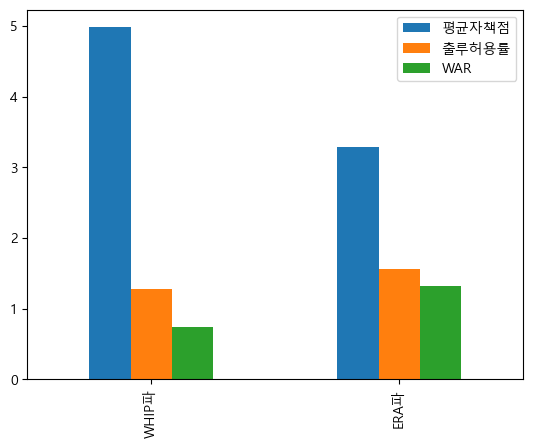

In [101]:
whip_era[['평균자책점', '출루허용률', 'WAR']].plot(kind='bar')

<AxesSubplot:>

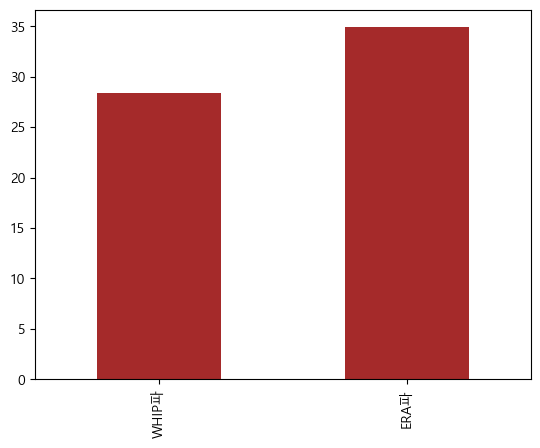

In [105]:
whip_era['승계주자실점'].plot(kind='bar', color='brown')

In [109]:
len(df3)

266

<AxesSubplot:xlabel='ERA', ylabel='승계주자실점'>

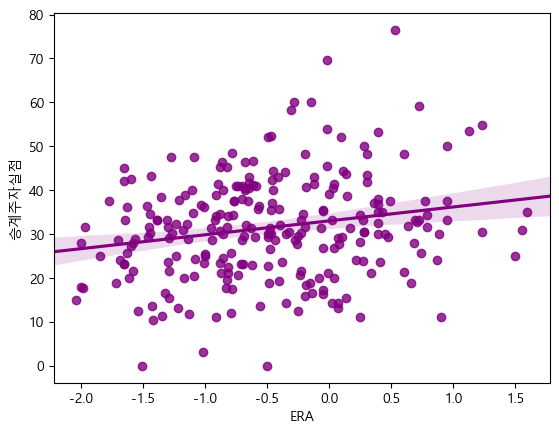

In [20]:
sns.regplot(x='ERA', y='승계주자실점', data=df3, color='purple')

<AxesSubplot:xlabel='WHIP', ylabel='승계주자실점'>

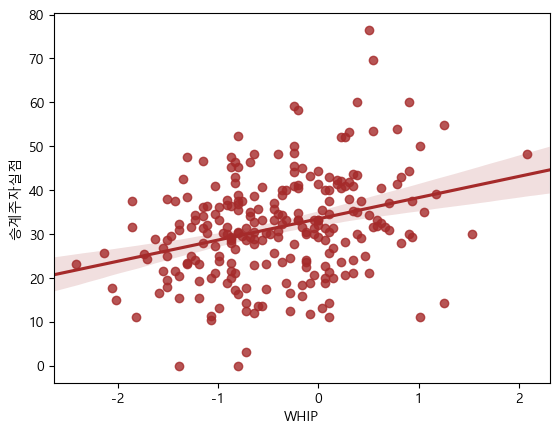

In [21]:
sns.regplot(x='WHIP', y='승계주자실점', data=df3, color='brown')

<AxesSubplot:xlabel='WHIP-ERA', ylabel='승계주자실점'>

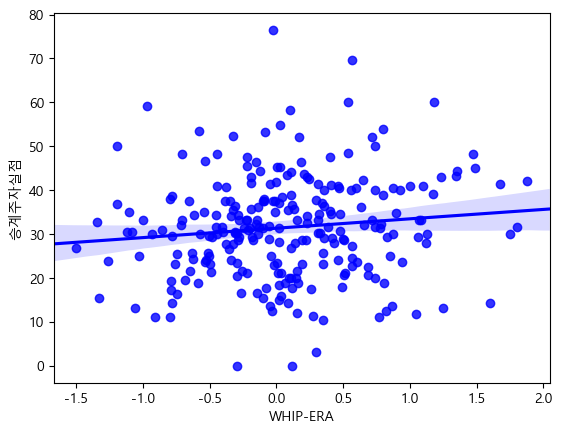

In [22]:
sns.regplot(x='WHIP-ERA', y='승계주자실점', data=df3, color='blue')

<AxesSubplot:xlabel='enLI', ylabel='승계주자실점'>

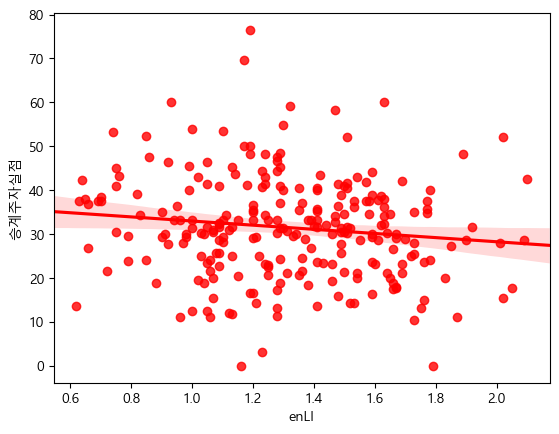

In [23]:
sns.regplot(x='enLI', y='승계주자실점', data=df3, color='red')

<AxesSubplot:xlabel='ERA', ylabel='WAR'>

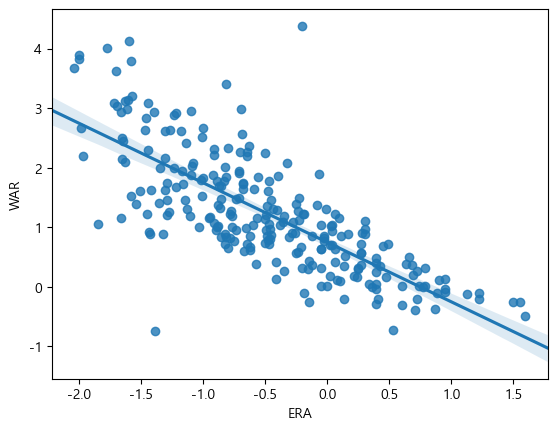

In [24]:
sns.regplot(x='ERA', y='WAR', data=df3)

<AxesSubplot:xlabel='WHIP', ylabel='WAR'>

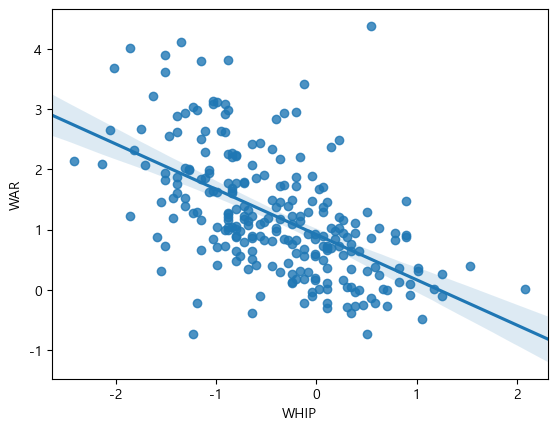

In [25]:
sns.regplot(x='WHIP', y='WAR', data=df3)

In [26]:
df3.corr()

,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
ERA,1.000000,0.650299,-0.759997,0.617285,-0.439103,0.209041,-0.251410
WHIP,0.650299,1.000000,-0.559627,0.542686,0.396975,0.312354,-0.230301
WAR,-0.759997,-0.559627,1.000000,-0.444707,0.256370,-0.182085,0.430965
FIP,0.617285,0.542686,-0.444707,1.000000,-0.103982,0.276182,-0.234927
WHIP-ERA,-0.439103,0.396975,0.256370,-0.103982,1.000000,0.116847,0.031382
승계주자실점,0.209041,0.312354,-0.182085,0.276182,0.116847,1.000000,-0.129348
enLI,-0.251410,-0.230301,0.430965,-0.234927,0.031382,-0.129348,1.000000


In [27]:
pd.options.display.max_columns=None

In [28]:
#df4 = df3.join(pitcher_df[['IRNG', 'IE+', 'ORNG', 'OARM', 'OE+']])

In [29]:
#df4.reset_index(['이름', '팀']).groupby('팀').mean()

In [30]:
df3.sort_values(by='WHIP-ERA', ascending=False)

,,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
이름,팀,,,,,,,
김강률,21두산,-1.651547,0.227844,2.49,3.53,1.879392,42.1,1.69
윤대경,20한화,-1.968632,-0.166356,2.20,4.14,1.802276,31.6,1.09
정해영,20KIA,-0.852494,0.897985,1.47,4.46,1.750479,30.0,1.67
김성민,21키움,-0.896886,0.779725,0.95,5.41,1.676611,41.4,1.48
임정호,21NC,-0.345159,1.252765,0.27,4.95,1.597924,14.3,1.21
류진욱,21NC,-1.657889,-0.166356,1.15,4.03,1.491533,45.0,0.75
김유영,22롯데,0.606095,2.080585,0.02,3.32,1.474490,48.3,1.24
배재환,20NC,-0.452968,0.897985,0.87,6.09,1.350952,44.4,1.23
최성훈,21LG,-1.435930,-0.087516,0.92,3.75,1.348414,43.2,0.76


In [31]:
df3.sort_values(by='승계주자실점', ascending=False)

,,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
이름,팀,,,,,,,
정성곤,19KT,0.529994,0.503785,-0.73,4.78,-0.026210,76.5,1.19
이종혁,18KT,-0.021733,0.543205,0.86,4.62,0.564937,69.6,1.17
노건우,20삼성,-0.148567,0.385525,-0.26,5.23,0.534091,60.0,0.93
원종현,21NC,-0.281742,0.897985,0.91,4.22,1.179727,60.0,1.63
박정배,18SSG,0.726587,-0.245196,0.26,5.29,-0.971782,59.1,1.32
강재민,22한화,-0.307109,-0.205776,0.83,5.05,0.101333,58.3,1.47
박희수,17SSG,1.227580,1.252765,-0.10,6.52,0.025185,54.8,1.30
김윤수,20삼성,-0.021733,0.779725,0.82,4.99,0.801457,53.9,1.00
박시영,17롯데,1.126113,0.543205,-0.13,6.74,-0.582909,53.6,1.10


In [32]:
df3.describe()

,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
count,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,-0.481835,-0.412810,1.22868,4.249000,0.069026,31.500800,1.315080
std,0.768375,0.752140,1.01044,0.894471,0.635976,11.635367,0.318868
min,-2.038390,-2.413296,-0.74000,2.240000,-1.498956,0.000000,0.620000
25%,-1.015793,-0.915336,0.53000,3.605000,-0.325083,23.625000,1.090000
50%,-0.497360,-0.422586,1.05500,4.210000,0.021454,31.300000,1.290000
75%,0.041684,0.109584,1.82000,4.817500,0.473527,38.400000,1.540000
max,1.595398,2.080585,4.38000,7.210000,1.879392,76.500000,2.100000


In [111]:
df3.loc[(df3['WHIP'] > df3['WHIP'].quantile(0.75)) & (df3['ERA'] < df3['ERA'].quantile(0.25))]

,,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
이름,팀,,,,,,,
김강률,21두산,-1.651547,0.227844,2.49,3.53,1.879392,42.1,1.69


In [112]:
df3.loc[(df3['WHIP'] < df3['WHIP'].quantile(0.25)) & (df3['ERA'] > df3['ERA'].quantile(0.75))]

,,ERA,WHIP,WAR,FIP,WHIP-ERA,승계주자실점,enLI
이름,팀,,,,,,,
권혁,19두산,0.136809,-1.191276,-0.21,4.06,-1.328085,15.4,1.07
윤희상,18SSG,0.269985,-0.994176,0.71,4.62,-1.264161,23.8,0.79
이동현,17LG,0.067051,-0.994176,0.41,3.58,-1.061227,13.3,1.75
